In [1]:
import numpy as np

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [2]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [3]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [4]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [5]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [6]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# 3. Exchange economy

In [7]:
from scipy import linalg
from scipy import optimize
import sympy as sm
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [8]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**The answer to this question is mostly based on Lecture 2, 3, 4, 10 and Problem Set 2.**


# Question 1.1: Plot the histograms of the budget shares for each good across agents.

Inserting the income function into the implied demand function:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}}&=&\beta^{j}_i\frac{p_1 e_1^j + p_2 e_2^j +e_3^j}{p_{i}}\\
\end{eqnarray*}
$$

The equilibrium is a set of prices \\( p_1 \\), \\( p_2 \\) and \\(p_3\\) = 1 (numeraire good) satifying:


\\[ 
\begin{eqnarray*}
x_1(p_1,p_2) = \sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j}) &=& \sum_{j=1}^N \beta_1^j \frac{p_1 e_1^j + p_2 e_2^j+ e_3^j}{p_1}\\
x_2(p_1,p_2) = \sum_{j=1}^N x_{2}^{\star j}(p_{1},p_{2},e^{j}) &=& \sum_{j=1}^N \beta_2^j \frac{p_1 e_1^j + p_2 e_2^j+ e_3^j}{p_2}\\
x_3(p_1,p_2) = \sum_{j=1}^N x_{3}^{\star j}(p_{1},p_{2},e^{j}) &=& \sum_{j=1}^N \beta_3^j (p_1 e_1^j + p_2 e_2^j+ e_3^j)
\end{eqnarray*}
\\]


Rearrainging the implied demand function to:
$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

$$
\begin{eqnarray*}
x_{i}^{\star j} p_{i} &=& \beta_i^j I^j \\
\end{eqnarray*}
$$

shows that $\beta$ is the fraction of consumer j's income share for good i. 

In [9]:
print(betas) #gives us an idea of the betas for all 50000 consumers

[[0.53104511 0.30693723 0.16201766]
 [0.50866997 0.4162364  0.07509363]
 [0.83317207 0.07722226 0.08960567]
 ...
 [0.63725404 0.22027742 0.14246854]
 [0.78205036 0.11988119 0.09806844]
 [0.65552751 0.24728801 0.09718448]]


In [10]:
type(betas)

numpy.ndarray

In [11]:
#extracting the first, second and third column of the betas goves us the betas for the respective good 1, 2 and 3
beta1 = betas[:,0]
beta2 = betas[:,1]
beta3 = betas[:,2]
print(beta1) #to check

[0.53104511 0.50866997 0.83317207 ... 0.63725404 0.78205036 0.65552751]


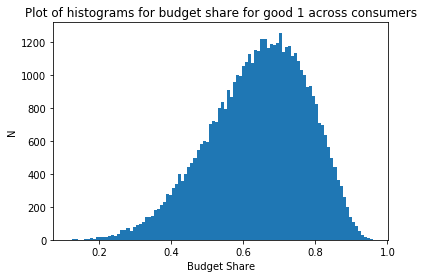

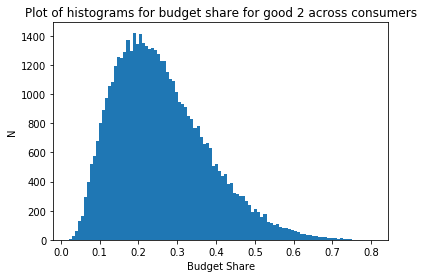

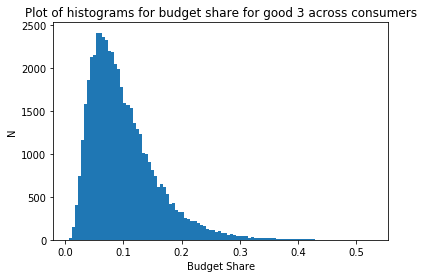

In [12]:
# Histograms

plt.hist(beta1, bins=100) #100 bins means grouping into 100 sections between 0 and 1
plt.title("Plot of histograms for budget share for good 1 across consumers")
plt.xlabel("Budget Share")
plt.ylabel("N")
plt.show()

plt.hist(beta2, bins=100) #100 bins means grouping into 100 sections between 0 and 1
plt.title("Plot of histograms for budget share for good 2 across consumers")
plt.xlabel("Budget Share")
plt.ylabel("N")
plt.show()

plt.hist(beta3, bins=100) #100 bins means grouping into 100 sections between 0 and 1
plt.title("Plot of histograms for budget share for good 3 across consumers")
plt.xlabel("Budget Share")
plt.ylabel("N")
plt.show()

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$


# Question 3.2: Plot the excess demand functions.

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j = 0 $$

If the excess demand equals 0, Walras's law is fulfilled.

But first, we define the demand for each good's market dependent on \\(p_1\\) and \\(p_2\\).

In [13]:
p3 = 1 #define the price of the numeraire good

def demand1_EE(betas,p1,p2,e1,e2,e3):
    I = p1*e1 + p2*e2 + e3
    return beta1*(I/p1)

def demand2_EE(betas,p1,p2,e1,e2,e3):
    I = p1*e1 + p2*e2 + e3
    return beta2*(I/p2)

def demand3_EE(betas,p1,p2,e1,e2,e3):
    I = p1*e1 + p2*e2 + e3
    return beta3*(I/p3)

Walras's law constitutes that if all other markets are in an equilibrium, the last one has to be, too. Therefore, solving 2 markets should result in the 3rd one not having any excess demand.

In [14]:
#defining the excess demand functions for all goods
def excess_demand1_EE(betas,p1,p2,e1,e2,e3):
    
    demand_EE = np.sum(demand1_EE(betas,p1,p2,e1,e2,e3))
    
    supply_EE = np.sum(e1)
    
    excess_demand_EE = demand_EE - supply_EE
    
    return excess_demand_EE

def excess_demand2_EE(betas,p1,p2,e1,e2,e3):
    
    demand_EE = np.sum(demand2_EE(betas,p1,p2,e1,e2,e3))
    
    supply_EE = np.sum(e2)
    
    excess_demand_EE = demand_EE - supply_EE
    
    return excess_demand_EE

def excess_demand3_EE(betas,p1,p2,e1,e2,e3):
    
    demand_EE = np.sum(demand3_EE(betas,p1,p2,e1,e2,e3))
    
    supply_EE = np.sum(e3)
    
    excess_demand_EE = demand_EE - supply_EE
    
    return excess_demand3_EE

Since \\(p_3 = 1\\) is set, we have \\(p_1\\) and \\(p_2\\) as the variables on the x and y axis of the 3D graph. The z axsis represents the excess demand for the respective.

In [15]:
from mpl_toolkits.mplot3d import Axes3D
#grids
p1_vec = np.linspace(1,10,100) #create a linear vector in the interval [1,10] with 100 evenly spaced points
p2_vec = np.linspace(1,10,100)

#we need empty grids for the excess demand 1
e_demand1_grid_EE = np.empty((100,100))

for i,p1 in enumerate(p1_vec):
    for j,p2 in enumerate(p2_vec):
        e_demand1_grid_EE[i,j] = excess_demand1_EE(betas,p1,p2,e1,e2,e3)


p1_grid,p2_grid = np.meshgrid(p1_vec,p2_vec,indexing='ij')
excess_demand1_grid_EE = excess_demand1_EE(betas,p1_grid,p2_grid,e1,e2,e3)

# b. main
fig_excess_demand1_EE = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.contour3D(p1_grid,p2_grid,50,cmap='binary')
#cs = ax.plot_surface(p1_grid,p2_grid,excess_demand1_grid_EE,cmap=cm.jet)

# c. add labels
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$Z_1$')


plt.show()

ValueError: operands could not be broadcast together with shapes (100,100) (50000,) 

# Quesiton 3.3: Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

In [16]:
#step 1: Guess on p1 and p2, tolerance epsilon and adjustment parameter kappa
p1 = 0.5
p2 = 0.5
kappa = 0.8
eps = 1e-8


def equilibrium_EE(betas,p1,p2,e1,e2,e3,kappa=0.8,eps=1e-8,maxiter=10000):
    
    t = 0
    while True:

        #step 2: Define the equilibrium function incl. the excess demand functions for good 1 and 2
        Z1 = excess_demand1_EE(betas,p1,p2,e1,e2,e3)
        Z2 = excess_demand2_EE(betas,p1,p2,e1,e2,e3)

        
        #step 3: define whether to stop or not
        if  np.abs(Z1) < eps or np.abs(Z2) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
            break    
    
        # step 4: change p's if not stopping
        p1 = p1 + kappa*Z1/N
        p2 = p2 + kappa*Z2/N
            
        
        if t < 5 or t%1000 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p1:12.8f} -> excess demand -> {Z2:14.8f}')
        elif t == 5:
            print('   ...')
            
        
        t += 1

    return p1, p2

In [17]:
# call the equilibrium function
p1, p2 = equilibrium_EE(betas,p1,p2,e1,e2,e3,kappa=kappa,eps=eps)

  0: p1 =   1.75618758 -> excess demand -> 78511.72403675
  0: p2 =   1.75618758 -> excess demand ->  1976.77594850
  1: p1 =   1.91889553 -> excess demand -> 10169.24631720
  1: p2 =   1.91889553 -> excess demand -> 30068.91485501
  2: p1 =   2.17170082 -> excess demand -> 15800.33081485
  2: p2 =   2.17170082 -> excess demand ->   331.86779583
  3: p1 =   2.36310422 -> excess demand -> 11962.71228988
  3: p2 =   2.36310422 -> excess demand ->  3333.01765190
  4: p1 =   2.52741831 -> excess demand -> 10269.63063665
  4: p2 =   2.52741831 -> excess demand ->  3630.14563580
   ...
1000: p1 =   6.49005422 -> excess demand ->     0.00085602
1000: p2 =   6.49005422 -> excess demand ->     0.00031934
1705: p1 =   6.49005515 -> excess demand ->     0.00000003
1705: p2 =   2.61669400 -> excess demand ->     0.00000001


In [18]:
#Check whether excess demand is actually close to zero
Z1 = excess_demand1_EE(betas,p1,p2,e1,e2,e3)
Z2 = excess_demand2_EE(betas,p1,p2,e1,e2,e3)
print(Z1,Z2)

2.6746420189738274e-08 9.975337889045477e-09


In [19]:
#the equilibrium prices are
p1, p2

(6.490055145458315, 2.616694000470743)

In [20]:
p1_old = p1
p2_old = p2

# Question 4: Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.


(Additional orientation Exercise 1)


In [21]:
#defining the utility function
def utlity_func_EE(beta1,beta2,beta3,p1,p2,e1,e2,e3,gamma):
    I = p1*e1 + p2*e2 + e3
    return (((beta1*(I/p1))**beta1)*((beta2*(I/p2))**beta2)*((beta3*I)**beta3))**gamma

In [22]:
#defining the utility vector - except endowments all known
utility_vec_EE = utlity_func_EE(beta1,beta2,beta3,p1,p2,e1,e2,e3,gamma)

print(utility_vec_EE)

[0.39804894 0.94209408 1.84280866 ... 0.9075745  1.07227294 1.34035517]


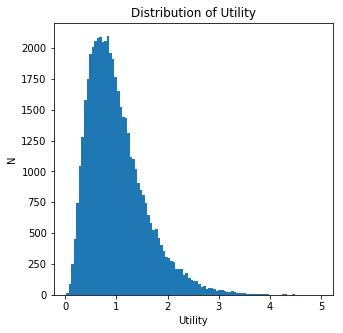

In [23]:
#plotting the distribution of utility as histogram (visualising the distribution)
fig_distr_utility = plt.figure(figsize=(5,5))

plt.hist(utility_vec_EE, bins=100) #100 bins means grouping into 100 sections between 0 and 1
plt.title("Distribution of Utility")
plt.xlabel("Utility")
plt.ylabel("N") # N refers to the number of consumers
plt.show()

In [24]:
#mean
mean = np.mean(utility_vec_EE)

#variance
var = np.var(utility_vec_EE)

mean, var

(1.010164459864386, 0.3173402050016366)

# Question 5: Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

In [25]:
#define the endowments as equally distributed

e1 = np.random.uniform(zeta,size=N)
e2 = np.random.uniform(zeta,size=N)
e3 = np.random.uniform(zeta,size=N)

In [26]:
"""Redo all the steps as previously when calculating the Walras Equilibrium"""

#step 1: Guess on p1 and p2, tolerance epsilon and adjustment parameter kappa
p1 = 0.5
p2 = 0.5
kappa = 0.8
eps = 1e-8


def equilibrium_EE(betas,p1,p2,e1,e2,e3,kappa=0.8,eps=1e-8,maxiter=10000):
    
    t = 0
    while True:

        #step 2: Define the equilibrium function incl. the excess demand functions for good 1 and 2
        Z1 = excess_demand1_EE(betas,p1,p2,e1,e2,e3)
        Z2 = excess_demand2_EE(betas,p1,p2,e1,e2,e3)

        
        #step 3: define whether to stop or not
        if  np.abs(Z1) < eps or np.abs(Z2) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {Z2:14.8f}')
            break    
    
        # step 4: change p's if not stopping
        p1 = p1 + kappa*Z1/N
        p2 = p2 + kappa*Z2/N
            
        
        if t < 5 or t%1000 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p1:12.8f} -> excess demand -> {Z2:14.8f}')
        elif t == 5:
            print('   ...')
            
        
        t += 1

    return p1, p2

In [28]:
# call find equilibrium function

p1, p2 = equilibrium_EE(betas,p1,p2,e1,e2,e3,kappa=kappa,eps=eps)


  0: p1 =   1.75530416 -> excess demand -> 78456.50975081
  0: p2 =   1.75530416 -> excess demand ->  1619.49434941
  1: p1 =   1.91580678 -> excess demand -> 10031.41422554
  1: p2 =   1.91580678 -> excess demand -> 30514.77399013
  2: p1 =   2.16983440 -> excess demand -> 15876.72579924
  2: p2 =   2.16983440 -> excess demand ->     8.04497900
  3: p1 =   2.36064982 -> excess demand -> 11925.96413845
  3: p2 =   2.36064982 -> excess demand ->  3235.38650474
  4: p1 =   2.52417695 -> excess demand -> 10220.44540570
  4: p2 =   2.52417695 -> excess demand ->  3586.86588124
   ...
1000: p1 =   6.44732586 -> excess demand ->     0.00073970
1000: p2 =   6.44732586 -> excess demand ->     0.00027504
1688: p1 =   6.44732665 -> excess demand ->     0.00000003
1688: p2 =   2.59082037 -> excess demand ->     0.00000001


In [29]:
p1, p1_old, p2, p2_old

(6.447326650556338, 6.490055145458315, 2.5908203659970717, 2.616694000470743)

The prices for the goods with uniformaly distributed endowments are minimally lower thanwith exponentially distributed endowments.

In [31]:
Z1, Z2 #just to check

(2.6746420189738274e-08, 9.975337889045477e-09)

Since the excess demand functions are close to zero, the result is credible.

**Plotting the distribution of utility:**

In [38]:
#vector of utility dependent on endowments
utility_vec2_EE = utlity_func_EE(beta1,beta2,beta3,p1,p2,e1,e2,e3,gamma)

print(utility_vec_EE)

[1.0251062  1.04838704 1.09560015 ... 1.0088854  1.04959874 1.00031624]


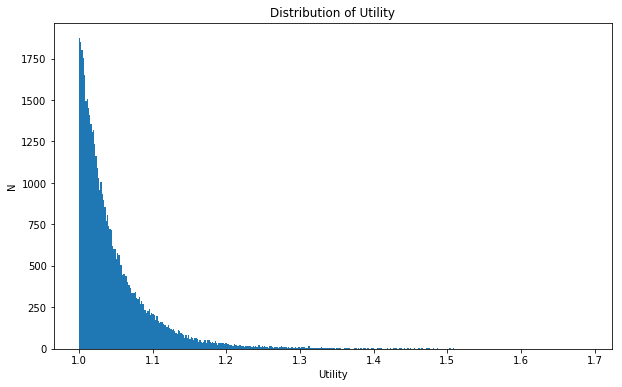

In [40]:
fig_distr_utility = plt.figure(figsize=(10,6))

plt.hist(utility_vec2_EE, bins=400) #400 bins means grouping into 400 sections between 0 and 1
plt.title("Distribution of Utility")
plt.xlabel("Utility")
plt.ylabel("N")
plt.show()


In [41]:
mean_new = np.mean(utility_vec2_EE)

#variance
var_new = np.var(utility_vec2_EE)

mean, mean_new, var, var_new

(1.010164459864386, 1.048024618603132, 0.3173402050016366, 0.00303580247992415)

The new utility function has a higher mean and a lot lower variance than before.
Now: does the value of \\(\gamma\\) play a role?